In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import os
for dirname, _, filenames in os.walk('C:/Users/Asus/Documents/S2/Datsci/World Happiness'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Asus/Documents/S2/Datsci/World Happiness\2015.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2016.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2017.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2018.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2019.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2020.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2021.csv
C:/Users/Asus/Documents/S2/Datsci/World Happiness\2022.csv


In [2]:
YEARS = list(range(2015, 2023))
YEARS_RANGE = [min(YEARS), max(YEARS)]

In [3]:
def get_data(path):
    def read_csv(year):
        return pd.read_csv("{0}/{1}.csv".format(path, year)).assign(year=year)

    return pd.concat([
        read_csv(year) for year in YEARS
    ], ignore_index=True)

In [4]:
raw_df = get_data("C:/Users/Asus/Documents/S2/Datsci/World Happiness")
print(raw_df.shape)
raw_df.head()

(1231, 52)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     617 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity  

In [6]:
raw_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Perceptions of corruption,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Dystopia + residual,RANK
count,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,...,613.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,147.000000
mean,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,...,0.416267,5.502645,0.056111,5.612629,5.392641,9.363053,2.198127,0.922248,2.198290,74.000000
std,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,...,0.340490,1.092111,0.020292,1.074850,1.110534,1.180595,0.229201,0.391830,0.595958,42.579338
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,...,0.000000,2.523000,0.025902,2.596000,2.449000,6.492642,1.972317,0.000000,0.257241,1.000000
25%,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,...,0.082000,4.769400,0.042000,4.885588,4.636008,8.483295,1.972317,0.633963,1.823000,37.500000
50%,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,...,0.306000,5.524500,0.052321,5.610132,5.426829,9.514612,1.972317,0.982509,2.223108,74.000000
75%,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,...,0.780623,6.248375,0.066000,6.362124,6.136381,10.356000,2.430000,1.241988,2.619750,110.500000
max,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,...,0.939000,7.842000,0.173000,7.904000,7.780000,11.647000,2.430000,1.751000,3.482000,147.000000


In [7]:
fixed_df = raw_df.copy()

fixed_df["Country"] = fixed_df["Country"].fillna(fixed_df["Country or region"]).fillna(fixed_df["Country name"])
fixed_df.drop(columns=["Country or region", "Country name"], inplace=True)
fixed_df = fixed_df[fixed_df["Country"] != "xx"]
fixed_df = fixed_df[~fixed_df["Country"].str.contains("\*").astype(bool)]
country_vc = fixed_df["Country"].value_counts()
fixed_df = fixed_df[fixed_df["Country"].isin(country_vc[country_vc == country_vc.max()].index)]

print(fixed_df.shape)
fixed_df.head()

(936, 50)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nonnan_cols = {
    year: set(fixed_df[fixed_df.year == year].dropna(axis=1).columns)
    for year in fixed_df.year.unique()
}
set.intersection(*nonnan_cols.values())

{'Country', 'year'}

In [9]:
print(
    "\n\n".join([
        "Non-nan columns in {0}: {1}".format(year, ", ".join(['"{0}"'.format(col) for col in cols]))
        for year, cols in nonnan_cols.items()
    ])
)

Non-nan columns in 2015: "Happiness Rank", "Standard Error", "Region", "Happiness Score", "Economy (GDP per Capita)", "Family", "Freedom", "Generosity", "Dystopia Residual", "Trust (Government Corruption)", "Country", "Health (Life Expectancy)", "year"

Non-nan columns in 2016: "Happiness Rank", "Region", "Happiness Score", "Economy (GDP per Capita)", "Family", "Freedom", "Generosity", "Dystopia Residual", "Lower Confidence Interval", "Upper Confidence Interval", "Trust (Government Corruption)", "Country", "Health (Life Expectancy)", "year"

Non-nan columns in 2017: "Dystopia.Residual", "Happiness.Score", "Generosity", "Health..Life.Expectancy.", "Freedom", "Family", "Trust..Government.Corruption.", "Whisker.low", "Country", "year", "Whisker.high", "Economy..GDP.per.Capita.", "Happiness.Rank"

Non-nan columns in 2018: "Generosity", "Score", "GDP per capita", "Overall rank", "Social support", "Healthy life expectancy", "Country", "year", "Freedom to make life choices"

Non-nan columns i

In [10]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 1229
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     936 non-null    object 
 1   Region                                      234 non-null    object 
 2   Happiness Rank                              234 non-null    float64
 3   Happiness Score                             234 non-null    float64
 4   Standard Error                              117 non-null    float64
 5   Economy (GDP per Capita)                    234 non-null    float64
 6   Family                                      351 non-null    float64
 7   Health (Life Expectancy)                    234 non-null    float64
 8   Freedom                                     351 non-null    float64
 9   Trust (Government Corruption)               234 non-null    float64
 10  Generosity   

In [11]:
#https://www.kaggle.com/code/htester/exploratory-data-analysis
#https://www.kaggle.com/code/marcellakomunita/k-means-clustering

In [12]:
df = fixed_df.copy()
df.rename(columns={"Country": "country"}, inplace=True)
# Region 
df["region"] = df["country"].replace(df[["country", "Region"]].set_index("country").dropna().to_dict()["Region"])
# Happiness score 
df["happiness_score"] = df["Happiness Score"].fillna(df["Happiness.Score"])\
                                             .fillna(df["Score"])\
                                             .fillna(df["Ladder score"])\
                                             .fillna(df["Happiness score"])\
                                             .astype(str).str.replace(",", ".").astype(float)
#GDP score
df["gdp_per_capita"] = df["Economy (GDP per Capita)"].fillna(df["Economy..GDP.per.Capita."])\
                                                     .fillna(df["GDP per capita"])\
                                                     .fillna(df["Explained by: Log GDP per capita"])\
                                                     .fillna(df["Explained by: GDP per capita"])\
                                                     .astype(str).str.replace(",", ".").astype(float)

#Freedom score
df["freedom"] = df["Freedom"].fillna(df["Freedom to make life choices"])\
                             .fillna(df["Explained by: Freedom to make life choices"])\
                             .astype(str).str.replace(",", ".").astype(float)


#Generosity score
df["generosity"] = df["Generosity"].fillna(df["Explained by: Generosity"])\
                                   .astype(str).str.replace(",", ".").astype(float)

#Health score
df["health"] = df["Health (Life Expectancy)"].fillna(df["Health..Life.Expectancy."])\
                                             .fillna(df["Healthy life expectancy"])\
                                             .fillna(df["Explained by: Healthy life expectancy"])\
                                             .astype(str).str.replace(",", ".").astype(float)

# Happiness rank 
df.sort_values(by=["year", "happiness_score"], ascending=[True, False], inplace=True)
df["happiness_rank"] = df.groupby("year").cumcount() + 1
df = df[["year", "country", "region", "happiness_rank", "happiness_score", "gdp_per_capita","freedom", "generosity", "health"]]
df = df.sort_values(by=["year", "happiness_rank"]).reset_index(drop=True)
print(df.shape)
df.head()

(936, 9)


,year,country,region,happiness_rank,happiness_score,gdp_per_capita,freedom,generosity,health
0,2015,Switzerland,Western Europe,1,7.587,1.39651,0.66557,0.29678,0.94143
1,2015,Iceland,Western Europe,2,7.561,1.30232,0.62877,0.43630,0.94784
2,2015,Denmark,Western Europe,3,7.527,1.32548,0.64938,0.34139,0.87464
3,2015,Norway,Western Europe,4,7.522,1.45900,0.66973,0.34699,0.88521
4,2015,Canada,North America,5,7.427,1.32629,0.63297,0.45811,0.90563


In [13]:
df_cor= df[[ "happiness_score", "gdp_per_capita","freedom", "generosity", "health"]]
spearman_cormatrix= df_cor.corr(method='spearman')
spearman_cormatrix

,happiness_score,gdp_per_capita,freedom,generosity,health
happiness_score,1.000000,0.743448,0.397379,0.067805,0.490706
gdp_per_capita,0.743448,1.000000,0.209246,-0.025235,0.363181
freedom,0.397379,0.209246,1.000000,-0.252262,0.668874
generosity,0.067805,-0.025235,-0.252262,1.000000,-0.437274
health,0.490706,0.363181,0.668874,-0.437274,1.000000


<Axes: >

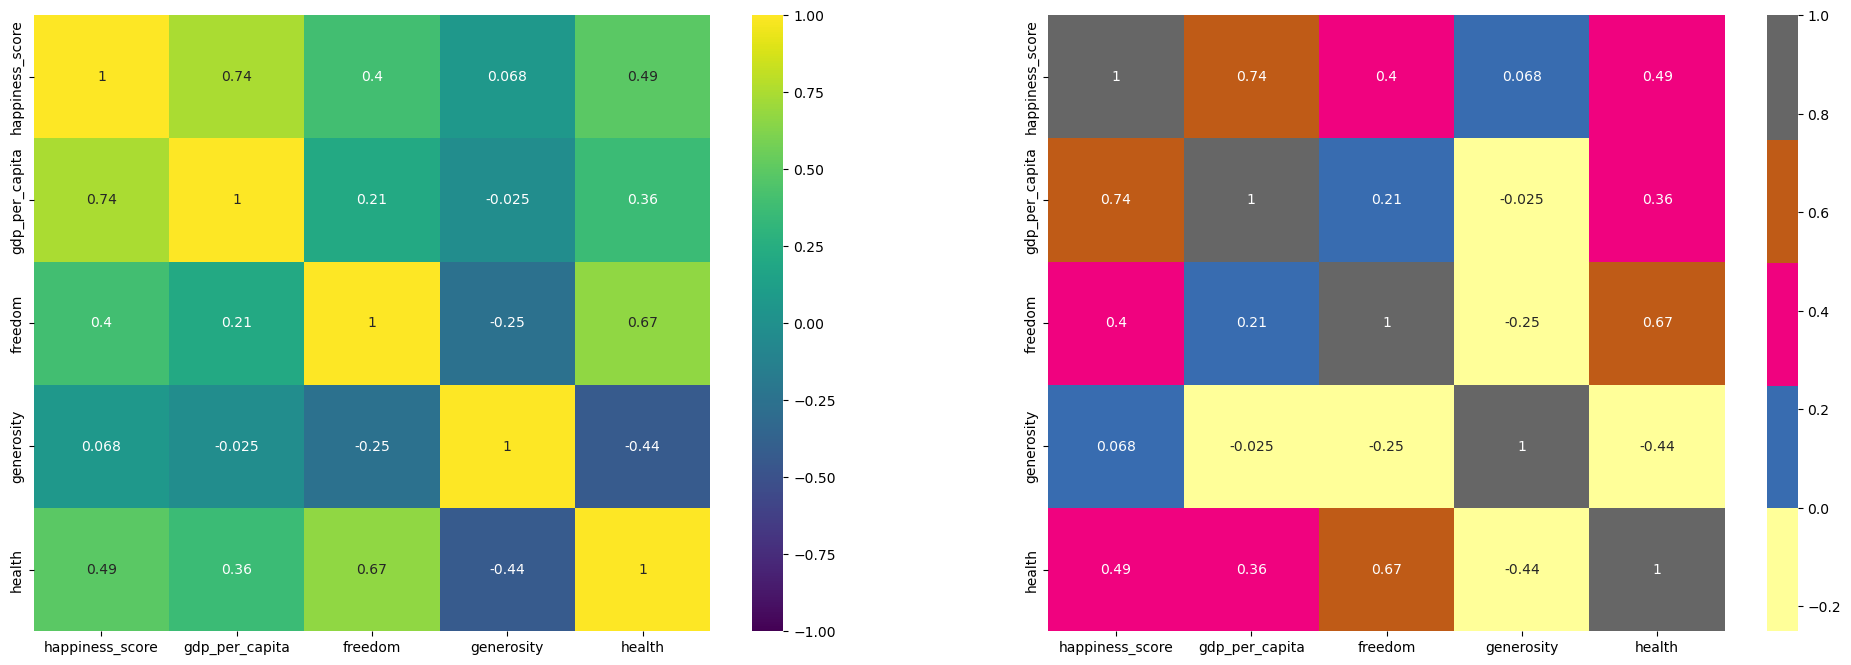

In [14]:
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

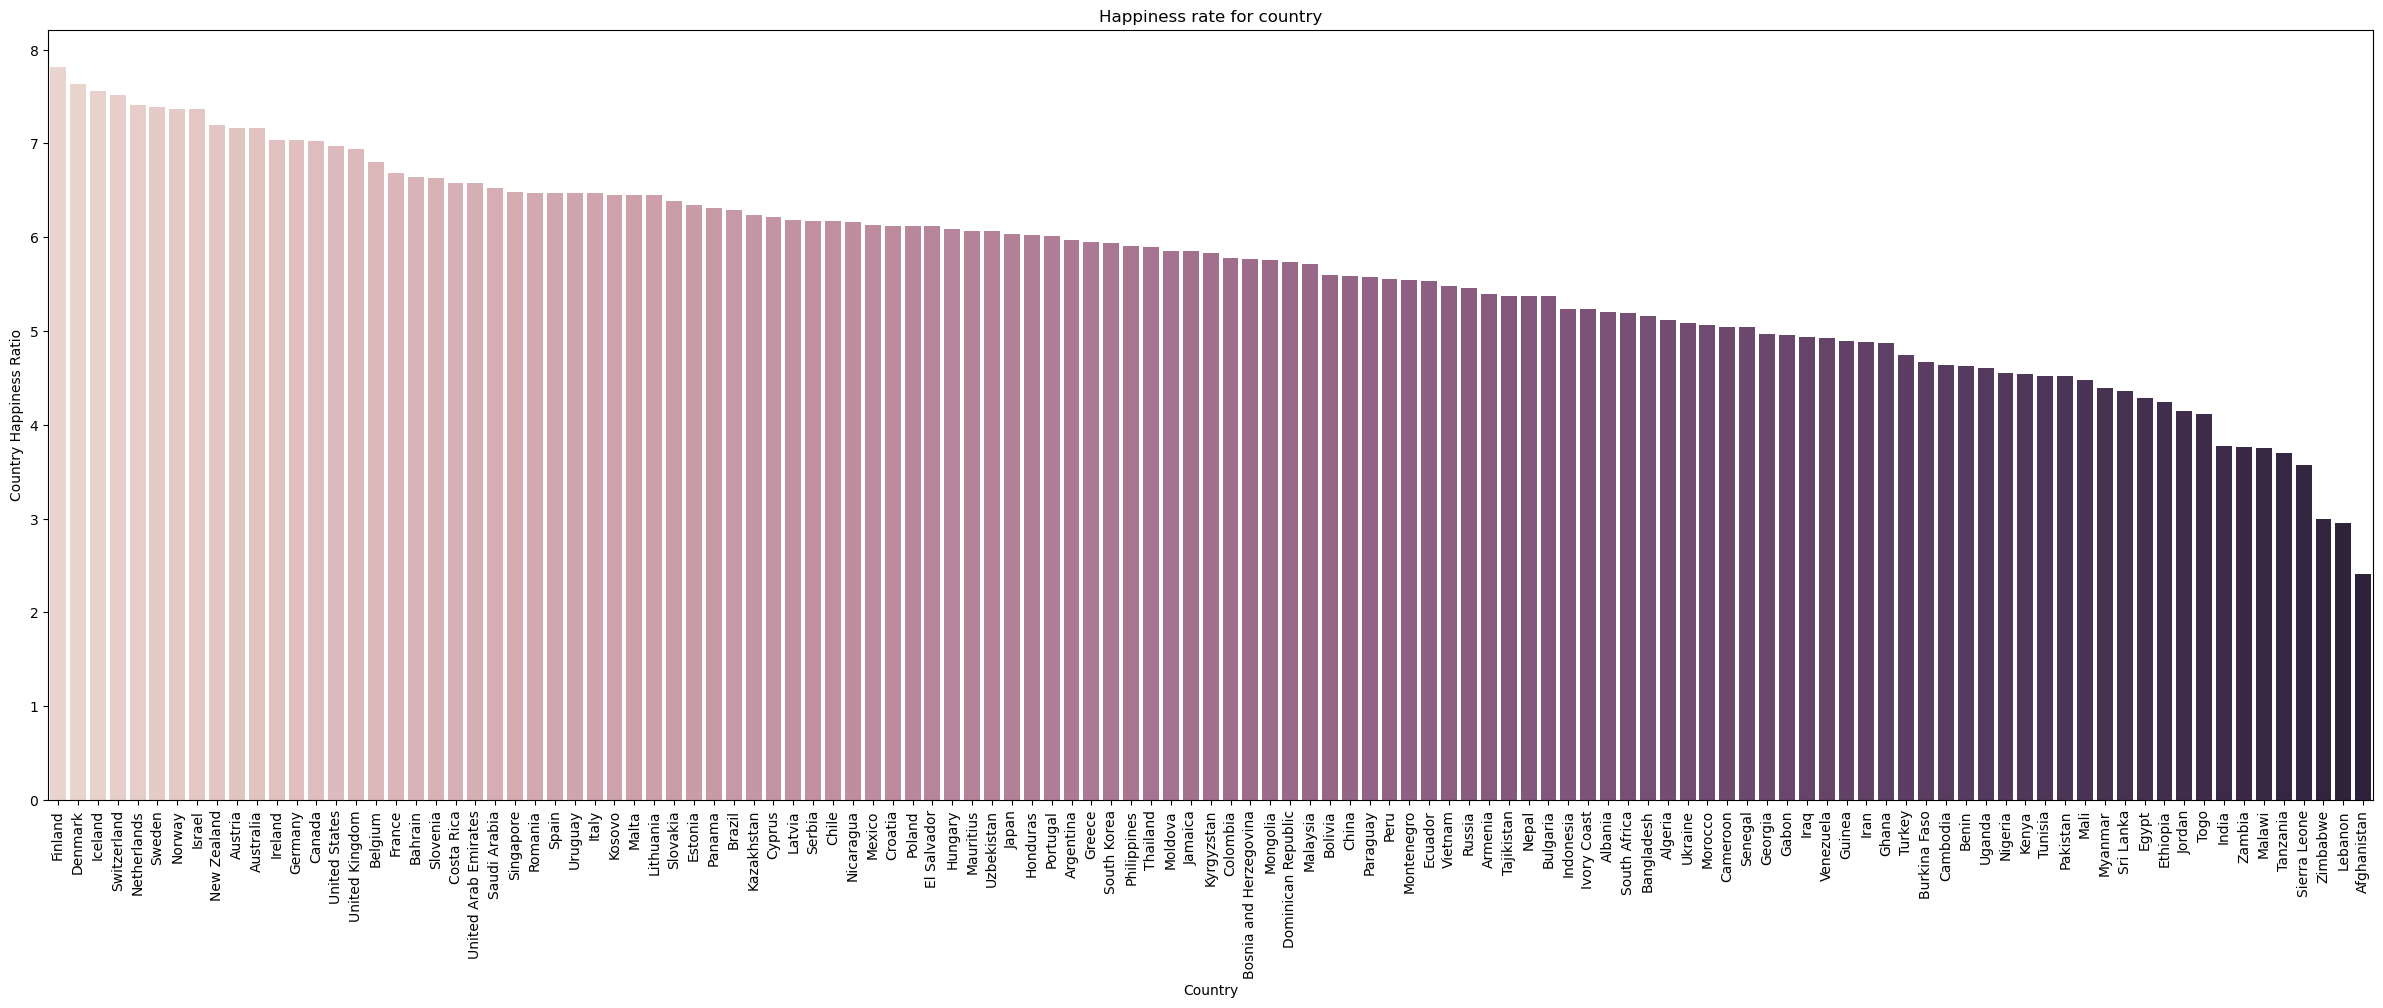

In [15]:
df_2022 = df[(df.year == 2022)]
df_2022 = df_2022[["country", "happiness_score", "gdp_per_capita"]]
plt.figure(figsize=(30,10))
sns.barplot(x=df_2022['country'], y=df_2022['happiness_score'],palette=sns.cubehelix_palette(len(df_2022['country'])))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Country Happiness Ratio')
plt.title('Happiness rate for country')
plt.show()


In [21]:
#import chart_studio.plotly as py
import collections
from plotly.offline import init_notebook_mode , iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go 

In [22]:
import seaborn as sns
#from collections import counter
import matplotlib.pyplot as plt 
#from wordcloud import WordCloud
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


In [ ]:
# slider cloropleth
#https://www.geeksforgeeks.org/how-to-make-a-choropleth-map-with-a-slider-using-plotly-in-python/
#https://community.sisense.com/t5/knowledge/plotly-choropleth-with-slider-map-charts-over-time/ta-p/9387

In [23]:
df_2022

,country,happiness_score,gdp_per_capita
819,Finland,7.821,1.892
820,Denmark,7.636,1.953
821,Iceland,7.557,1.936
822,Switzerland,7.512,2.026
823,Netherlands,7.415,1.945
...,...,...,...
931,Tanzania,3.702,0.848
932,Sierra Leone,3.574,0.686
933,Zimbabwe,2.995,0.947
934,Lebanon,2.955,1.392


In [24]:
data = dict(type = 'choropleth', 
           locations = df_2022['country'],
           locationmode = 'country names',
           z = df_2022['happiness_score'],
           colorbar = {'title':'Happiness Scale'})
layout = dict(title = 'Global Happiness Ranking 2022', 
             geo = dict(showframe = False, 
                       projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

In [ ]:
#chart studio
# https://www.kaggle.com/code/sahilmaheshwari/world-happiness-report-eda-for-beginners

# https://www.kaggle.com/code/evangower/world-happiness-in-2021

#https://www.kaggle.com/code/manishagouda/eda-and-prediction-with-happiness-report
#https://www.kaggle.com/code/mathurinache/word-happiness-report-up-to-2022#Comparing--Health-(Life-Expectancy)-each-Country

#hv plot
#https://www.kaggle.com/code/annadurbanova/happiness-study-research-from-2015-2020

In [ ]:
data = dict(type = 'choropleth', 
           locations = df_2022['country'],
           locationmode = 'country names',
           z = df_2022['gdp_per_capita'],
           colorbar = {'title':'GDP per Capita'})
layout = dict(title = 'Global Happiness Ranking', 
             geo = dict(showframe = False, 
                       projection = {'type': 'natural earth'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap)

In [ ]:
import plotly.express as px
fig=px.line(df,x='year',y='happiness_score',color='country',template="plotly_white")
fig.show()

In [ ]:
fig=px.line(df,x='year',y='happiness_score',color='country',template="plotly_white",title='Year vs. Happiness Score')
fig.show()

In [ ]:
asean = ['Indonesia','Singapore','Myanmar','Brunei','Cambodia','Malaysia','Thailand','Laos','Timor-Leste','Vietnam', 'Philippines'] 
df_asean = df[df['country'].isin(asean)]
df_asean

,year,country,region,happiness_rank,happiness_score,gdp_per_capita,freedom,generosity,health
21,2015,Singapore,Southeastern Asia,22,6.798,1.52186,0.54252,0.31105,1.02525
29,2015,Thailand,Southeastern Asia,30,6.455,0.96690,0.55664,0.57630,0.73850
50,2015,Malaysia,Southeastern Asia,51,5.770,1.12486,0.53024,0.33075,0.72394
59,2015,Indonesia,Southeastern Asia,60,5.399,0.82827,0.46611,0.51535,0.63793
60,2015,Vietnam,Southeastern Asia,61,5.360,0.63216,0.59444,0.16860,0.74676
...,...,...,...,...,...,...,...,...,...
882,2022,Malaysia,Southeastern Asia,64,5.711,1.68900,0.65400,0.21300,0.62000
889,2022,Vietnam,Southeastern Asia,71,5.485,1.25200,0.70700,0.14300,0.61100
895,2022,Indonesia,Southeastern Asia,77,5.240,1.38200,0.62000,0.46800,0.53900
914,2022,Cambodia,Southeastern Asia,96,4.640,1.01900,0.74000,0.16600,0.50500


In [ ]:
fig=px.line(df_asean,x='year',y='happiness_score',color='country',template="plotly_white",title='Year vs. Happiness Score')
fig.show()

In [ ]:
fig=px.line(df_asean,x='year',y='gdp_per_capita',color='country',template="plotly_white",title='Year vs. Economy (GDP per Capita) ')
fig.show()

In [ ]:
fig=px.line(df_asean,x='year',y='health',color='country',template="plotly_white",title='Year vs. Health (Life Expectancy)')
fig.show()